# Assignment 5

CS4172 Machine Learning Lab

Name: Abhiroop Mukherjee

Enrolment Number: 510519109

## Task 1

Download and install TensorFlow from
https://www.tensorflow.org/install/install_sources or using command
`sudo pip install tensorflow` alternatively the Keras library can be used.

Download MNIST dataset (contains class labels for digits 0-9). using 
the command:

```python
import tensorflow as tf
data = tf.contrib.learn.datasets.mnist.load_mnist()
```
or 
```python
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

In [1]:
import tensorflow as tf
mnist_data = tf.keras.datasets.mnist.load_data()


In [2]:
mnist_data


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

mnist_data is a Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [3]:
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist_data

# mapping 0-255 to 0-1
x_train = np.array([img/255 for img in x_train])
x_test = np.array([img/255 for img in x_test])

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


## Task 3

Reduce the training size by 1/10 if computation resources are limited.

Define radial basis function (RBF) as

```python
def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))
```
where, x is the actual value, c is centre (assumed as mean) and s is the standard deviation.

Converted 28\*28 image into 32\*32 using rbf and store the new dataset with the labels. Split the dataset as 80% training and 10% validation
and 10% test.

In [4]:
import numpy as np


def RBF(x, c, s):
    return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2))

# TODO: used simple scaling to upscale the image,
# use rbf to do this in future


In [5]:
# from tensorflow.image import resize

# reshape to convert 28x28 image (assumed greyscale)
# to 28x28x1 (1 denoting only one value per pixel
# [rgb will have three numbers for eg])

# x_train = np.reshape(x_train, (-1, 28, 28, 1))
# x_train = np.array([resize(img, [32, 32]) for img in x_train])
# print(f"x_train shape: {x_train.shape}")

# x_test = np.reshape(x_test, (-1, 28, 28, 1))
# x_test = np.array([resize(img, [32, 32]) for img in x_test])
# print(f"x_test shape: {x_test.shape}")


In [6]:
import pandas as pd
# convert y to categorical
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()


In [7]:
y_train[0:9]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [8]:
input_shape = x_train[0].shape
num_classes = len(y_train[0])


## Task 4

Now run the fully connected network after flattening the data by changing the number the hyper-parameters use adam optimizer(learning rate = 0.001) and categorical cross-entropy loss

| Hidden Layers  | Activation Function  | Hidden Neurons    |
|----------------|----------------------|-------------------|
| 1              | Sigmoid              | \[16\]            |
| 2              | Sigmoid              | \[16,32\]         |
| 3              | Sigmoid              | \[16,32,64\]      |

In [9]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


def train_model(
        activation_function: 'str',
        hidden_neurons: 'list[int]',
        dropout_rate: 'float | None' = None,
        adam_learn_rate=0.001,
        verbose=True):

    model = Sequential()
    model.add(Input(shape=(input_shape)))
    model.add(Flatten())

    for unit in hidden_neurons[::-1]:
        model.add(Dense(unit, activation=activation_function))
        if dropout_rate is not None:
            model.add(Dropout(rate=dropout_rate))

    # softmax as it gives probabilistic value 
    # (sum of all the last nodes will be 1)
    model.add(Dense(num_classes, activation='softmax'))

    if verbose:
        model.summary()

    model.compile(optimizer=Adam(learning_rate=adam_learn_rate),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])
   
    history = model.fit(x=x_train,
                        y=y_train,
                        validation_split=0.1,
                        epochs=100,
                        callbacks=[
                            EarlyStopping(
                                monitor='val_loss',
                                patience=5,
                                restore_best_weights= True
                            )
                        ],
                        verbose='auto' if verbose else 0
                        )

    return model, history


def plot_history(
        history: "tf.keras.callbacks.History",
        activation_function: 'str',
        hidden_neurons: 'list[int]',
        dropout_rate: 'float | None' = None):

    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.ylabel('Training Loss')
    plt.xlabel('Epoch')
    plt.legend()

    if dropout_rate is None:
        plt.title(
            f'Loss vs epoch for {activation_function} {hidden_neurons}')
    else:
        plt.title(
            f'Loss vs epoch for {activation_function} {hidden_neurons} dropout {dropout_rate}')

    plt.show()

    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    if dropout_rate is None:
        plt.title(
            f'Accuracy vs epoch for {activation_function} {hidden_neurons}')
    else:
        plt.title(
            f'Accuracy vs epoch for {activation_function} {hidden_neurons} dropout {dropout_rate}')

    plt.legend()
    plt.show()


In [10]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


2022-10-11 23:10:03.374032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-11 23:10:03.453626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-11 23:10:03.453928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-11 23:10:03.454784: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Epoch 1/100
  43/1688 [..............................] - ETA: 5s - loss: 2.2135 - accuracy: 0.3110

2022-10-11 23:10:06.854396: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1688/1688 [==============================] - 10s 5ms/step - loss: 0.8212 - accuracy: 0.8289 - val_loss: 0.3672 - val_accuracy: 0.9160
Epoch 2/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3510 - accuracy: 0.9099 - val_loss: 0.2572 - val_accuracy: 0.9345
Epoch 3/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2811 - accuracy: 0.9219 - val_loss: 0.2245 - val_accuracy: 0.9377
Epoch 4/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2490 - accuracy: 0.9292 - val_loss: 0.2042 - val_accuracy: 0.9407
Epoch 5/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2290 - accuracy: 0.9344 - val_loss: 0.1916 - val_accuracy: 0.9462
Epoch 6/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2152 - accuracy: 0.9384 - val_loss: 0.1859 - val_accuracy: 0.9460
Epoch 7/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2034 - accuracy: 0.9414 - val_loss: 0.1769 - val_accuracy: 0.9

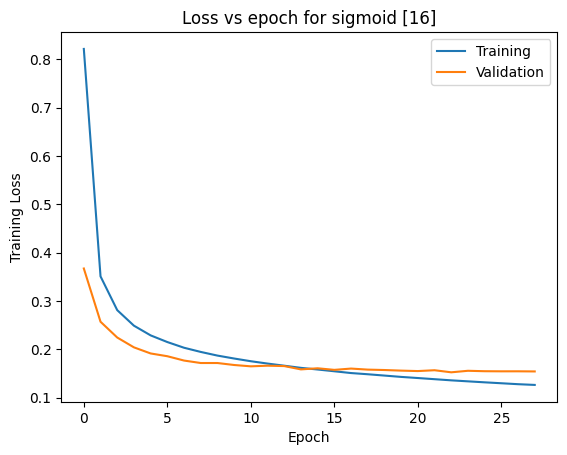

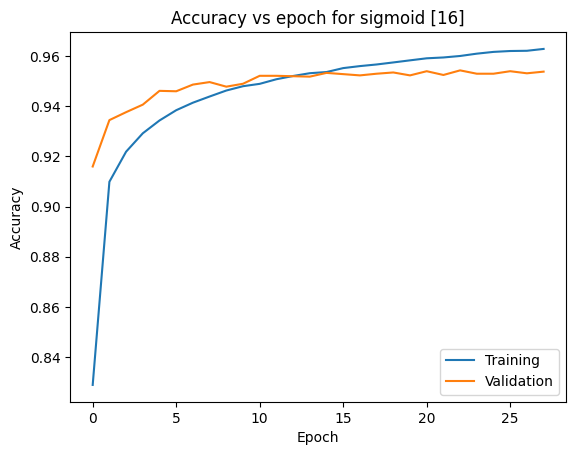

In [11]:
hidden_neurons = [16]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.9861 - accuracy: 0.8031 - val_loss: 0.3783 - val_accuracy: 0.9213
Epoch 2/100
1688/1688 [==============

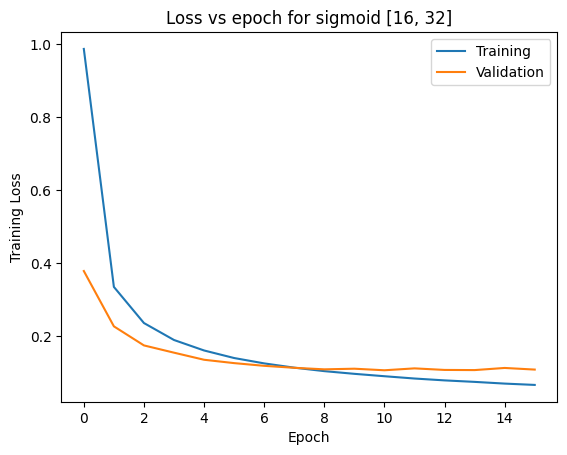

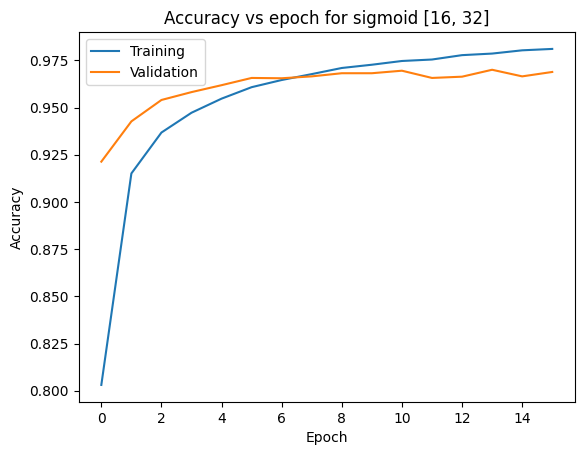

In [12]:
activation_function = 'sigmoid'
hidden_neurons = [16, 32]

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

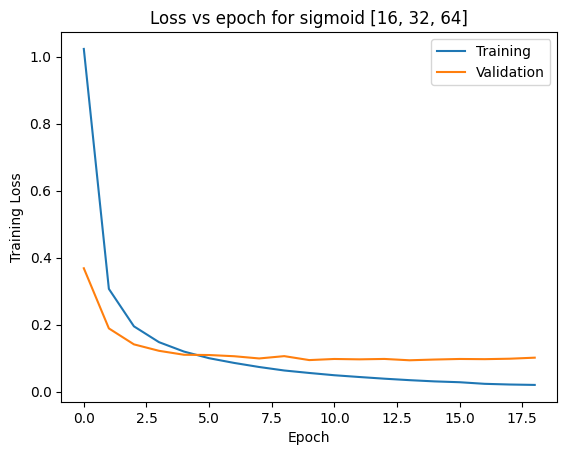

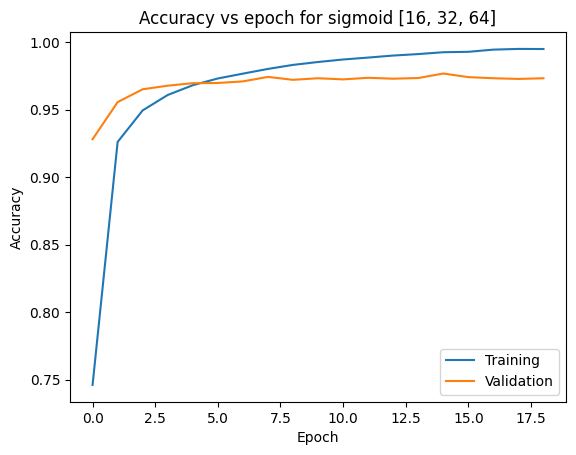

In [13]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


In [14]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Test Loss,Test Acccuracy
0,1,sigmoid,[16],0.185403,0.9463
1,2,sigmoid,"[16, 32]",0.125587,0.9622
2,3,sigmoid,"[16, 32, 64]",0.115278,0.9691


## Task 5

Now run the network by changing the number the Activation Function
hyper-parameters:

| Hidden Layers  | Activation Function  | Hidden Neurons    |
|----------------|----------------------|-------------------|
| 3              | Sigmoid              | \[16,32,64\]      |
| 3              | Tanh                 | \[16,32,64\]      |
| 3              | Relu                 | \[16,32,64\]      |

In [15]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

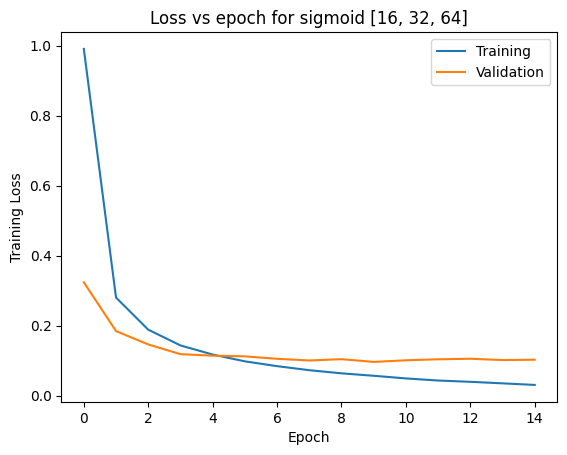

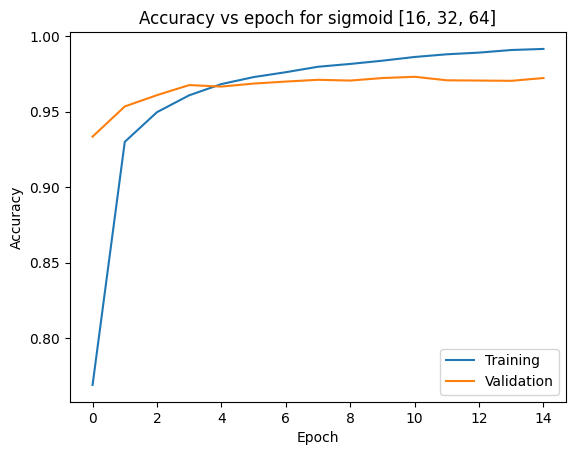

In [16]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

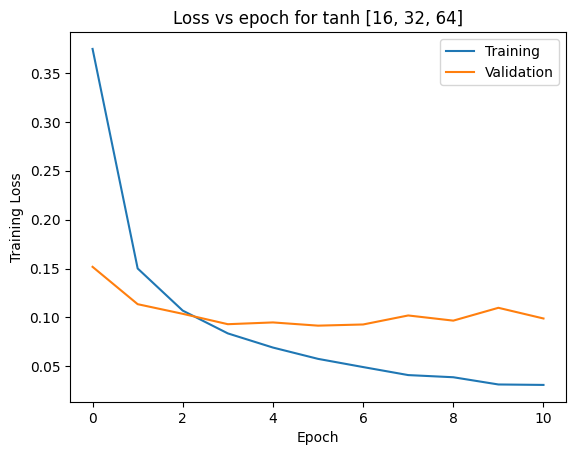

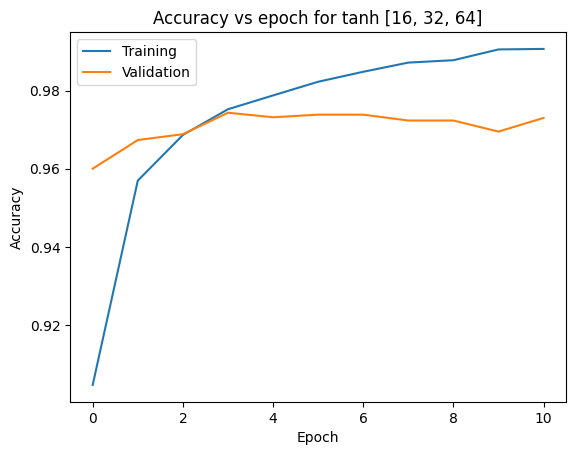

In [17]:
hidden_neurons = [16, 32, 64]
activation_function = 'tanh'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1688/1688 [===========================

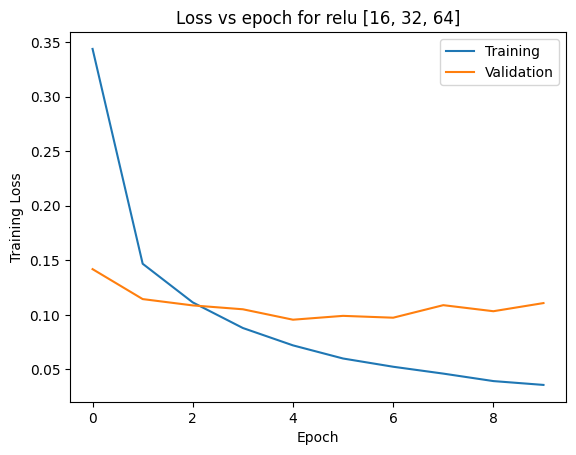

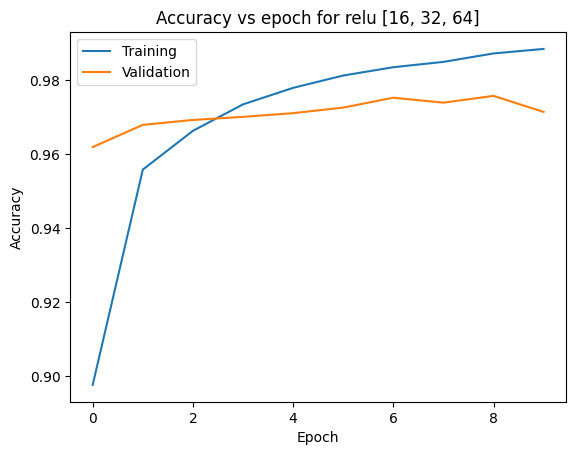

In [18]:
hidden_neurons = [16, 32, 64]
activation_function = 'relu'

model, history = train_model(activation_function, hidden_neurons)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons)


In [19]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Test Loss,Test Acccuracy
0,3,sigmoid,"[16, 32, 64]",0.108075,0.9670
1,3,tanh,"[16, 32, 64]",0.099317,0.9718
2,3,relu,"[16, 32, 64]",0.103462,0.9688


In [20]:
best_activation_fn = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Activation Function'].iloc[0]

best_activation_fn

'tanh'

## Task 6

Now run the network by changing the number the Dropout hyper-parameters:

| Hidden Layers  | Activation Function  | Hidden Neurons    | Dropout   |
|----------------|----------------------|-------------------|-----------|
| 3              | Relu                 | \[16,32,64\]      |0.9        |
| 3              | Relu                 | \[16,32,64\]      |0.75       |
| 3              | Relu                 | \[16,32,64\]      |0.5        |
| 3              | Relu                 | \[16,32,64\]      |0.25       |
| 3              | Relu                 | \[16,32,64\]      |0.10       |

In [21]:
result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout',
        'Test Loss',
        'Test Acccuracy'],
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)               

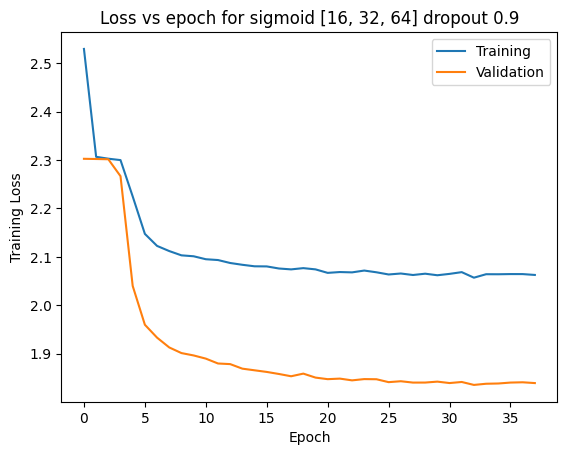

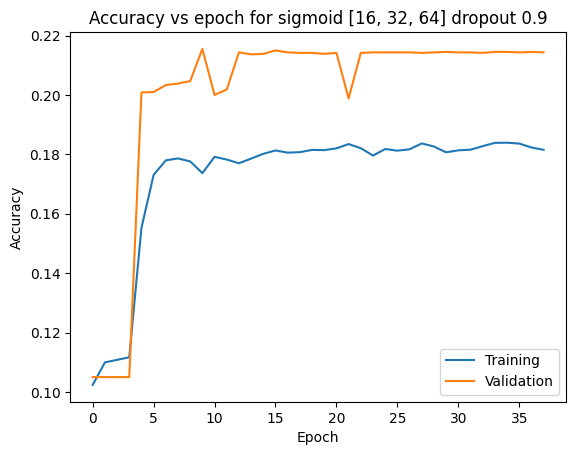

In [22]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.9

model, history = train_model(activation_function, hidden_neurons,dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)               

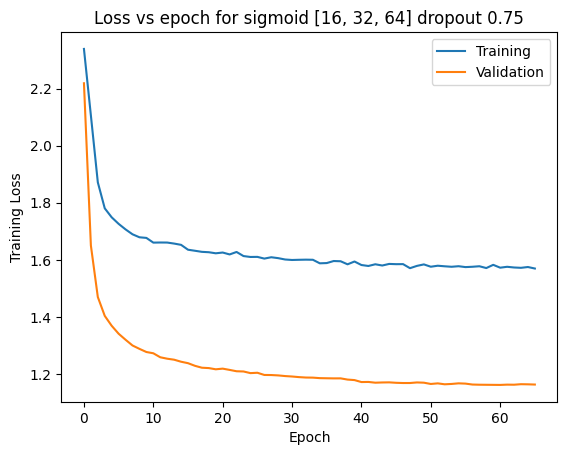

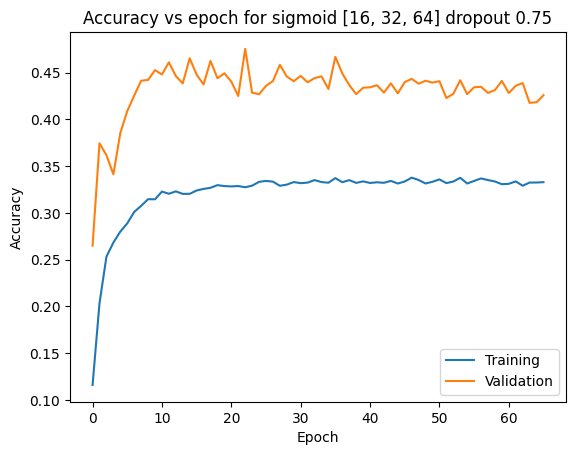

In [23]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.75

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)               

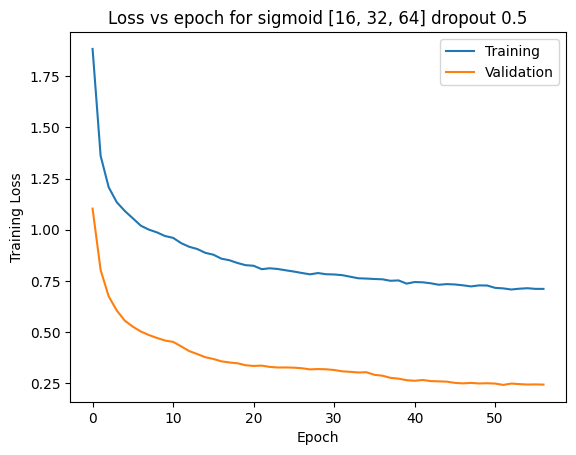

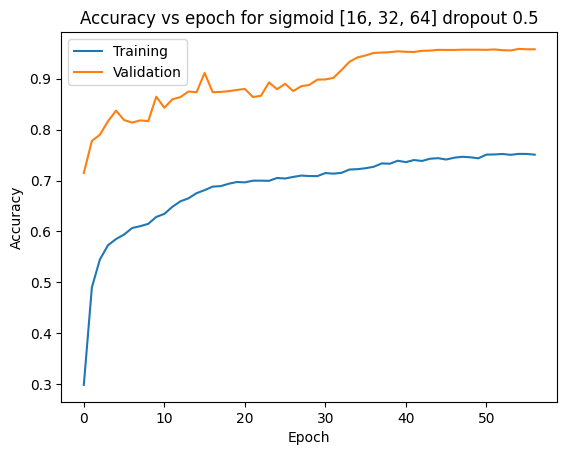

In [24]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.5

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)               

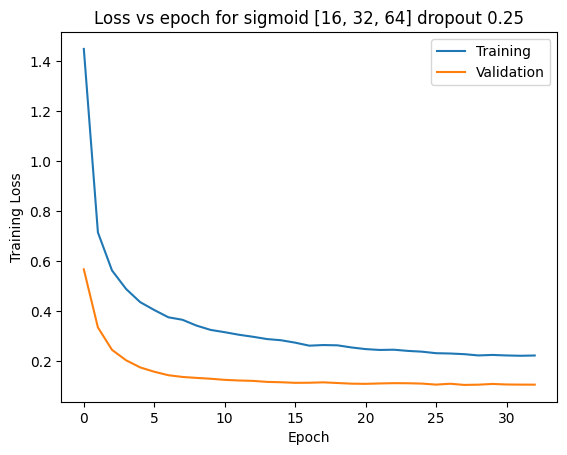

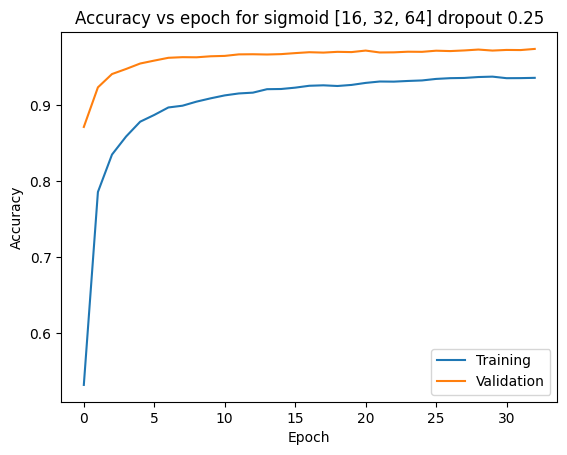

In [25]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.25

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                50240     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dropout_14 (Dropout)        (None, 16)              

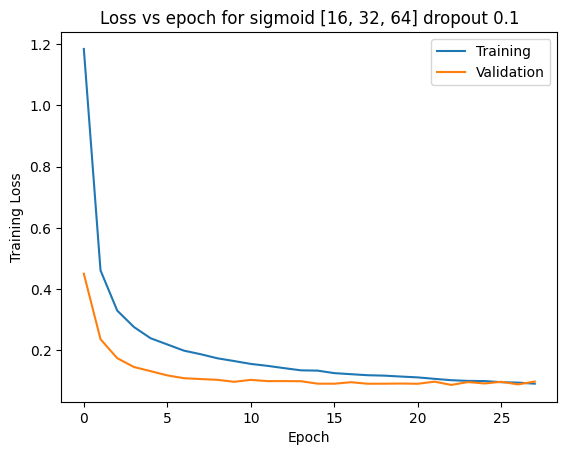

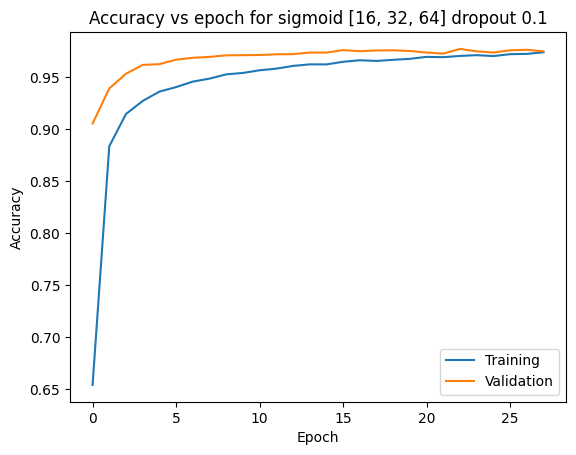

In [26]:
hidden_neurons = [16, 32, 64]
activation_function = 'sigmoid'
dropout_val = 0.1

model, history = train_model(activation_function, hidden_neurons, dropout_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"test_loss = {test_loss} test_acc = {test_acc}")

result.loc[len(result.index)] = [
    len(hidden_neurons),
    activation_function,
    str(hidden_neurons),
    dropout_val,
    test_loss,
    test_acc]

plot_history(history, activation_function, hidden_neurons, dropout_val)


In [27]:
result


,Hidden Layers,Activation Function,Hidden Neurons,Dropout,Test Loss,Test Acccuracy
0,3,sigmoid,"[16, 32, 64]",0.90,1.844174,0.2112
1,3,sigmoid,"[16, 32, 64]",0.75,1.203268,0.4367
2,3,sigmoid,"[16, 32, 64]",0.50,0.294015,0.9427
3,3,sigmoid,"[16, 32, 64]",0.25,0.129612,0.9654
4,3,sigmoid,"[16, 32, 64]",0.10,0.110598,0.9715


In [28]:
best_dropout = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Dropout'].iloc[0]

best_dropout

0.1

## Task 8

With  the  best    set    hyperparameter  from  above  run  vary  the 
Adam  Optimizer  learning  rate  [0.01,  0.001,  0.005,  0.0001,  0.0005]. Print  the  time  to  achieve  the  best  validation  accuracy  (as  reported before from all run)  for all these five run .

In [29]:
print(f"best activation function: {best_activation_fn}")
print(f"best dropout value: {best_dropout}")

best activation function: tanh
best dropout value: 0.1


In [30]:
import time

result = pd.DataFrame(
    columns=[
        'Hidden Layers',
        'Activation Function',
        'Hidden Neurons',
        'Dropout',
        'Adam Learn Rate',
        'Time Taken',
        'Test Loss',
        'Test Acccuracy'],
)

In [31]:
hidden_neurons = [16, 32, 64]
adam_learn_rates = [0.01,  0.001,  0.005,  0.0001,  0.0005]

for learn_rate in adam_learn_rates:
    start_time = time.time()
    model, _ = train_model(
        activation_function=best_activation_fn,
        hidden_neurons=hidden_neurons,
        adam_learn_rate=learn_rate,
        dropout_rate=best_dropout,
        verbose=False
    )
    end_time = time.time()

    time_taken = end_time - start_time

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    result.loc[len(result.index)] = [
    len(hidden_neurons),
    best_activation_fn,
    str(hidden_neurons),
    best_dropout,
    learn_rate,
    time_taken,
    test_loss,
    test_acc]


In [36]:
result

,Hidden Layers,Activation Function,Hidden Neurons,Dropout,Adam Learn Rate,Time Taken,Test Loss,Test Acccuracy
0,3,tanh,"[16, 32, 64]",0.1,0.0100,118.050604,0.251489,0.9322
1,3,tanh,"[16, 32, 64]",0.1,0.0010,176.123845,0.097136,0.9744
2,3,tanh,"[16, 32, 64]",0.1,0.0050,100.515579,0.173754,0.9525
3,3,tanh,"[16, 32, 64]",0.1,0.0001,409.954090,0.098051,0.9721
4,3,tanh,"[16, 32, 64]",0.1,0.0005,213.537920,0.101976,0.9723


In [32]:
best_adam_learn_rate = result.sort_values(
    by=['Test Acccuracy', 'Test Loss'],
    ascending=[False, True]
    )['Adam Learn Rate'].iloc[0]

best_adam_learn_rate

0.001

## Task 9

Create  five  image(size  28*28)  containing  a  digit  of  your  won 
handwriting and test whether  your trained classifier is able to predict it or not.

In [33]:
model, _ = train_model(
    activation_function=best_activation_fn,
    hidden_neurons=hidden_neurons,
    adam_learn_rate=best_adam_learn_rate,
    dropout_rate=best_dropout,
    verbose=True
)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 64)                50240     
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_63 (Dense)            (None, 16)                528       
                                                                 
 dropout_32 (Dropout)        (None, 16)              

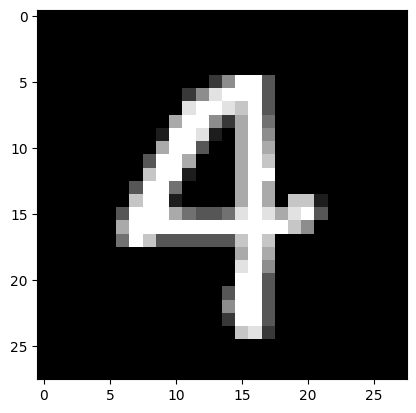

predict = 9


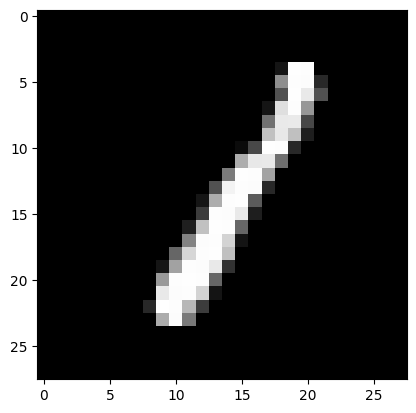

predict = 1


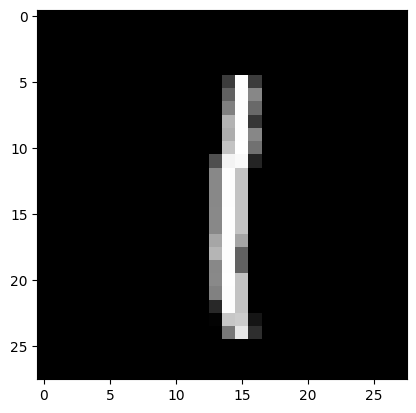

predict = 1


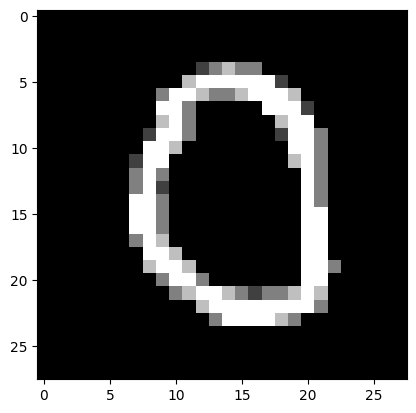

predict = 0


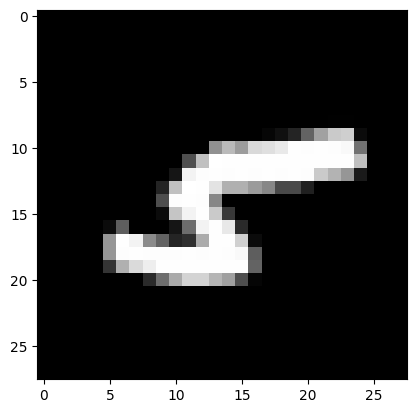

predict = 5


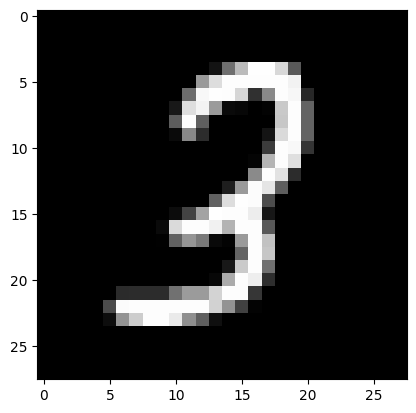

predict = 3


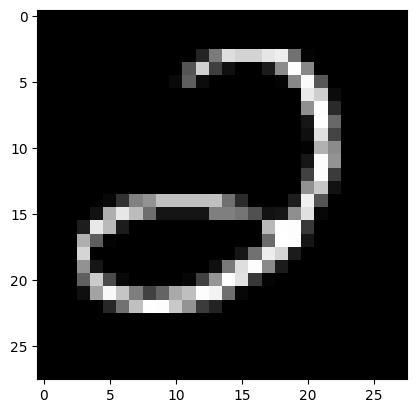

predict = 2


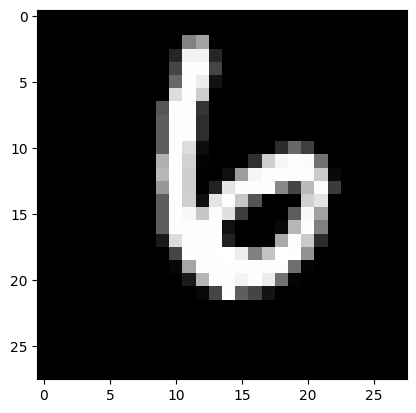

predict = 6


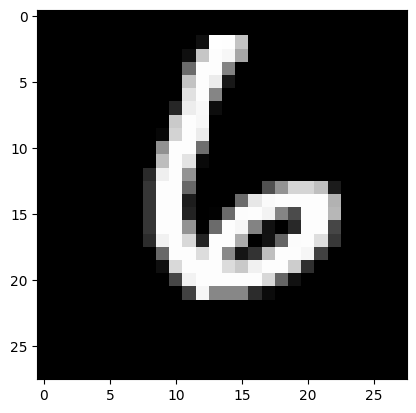

predict = 6


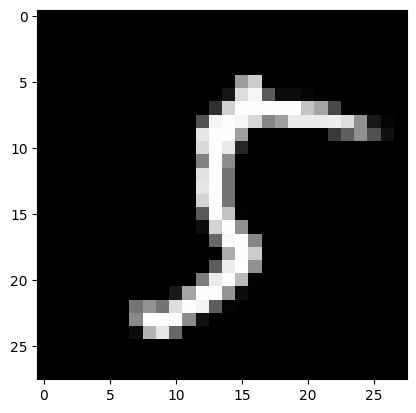

predict = 5


In [53]:
import random

random_idx = random.sample(range(0, len(x_test)), 10)

img_to_predict = np.array([x_test[idx] for idx in random_idx])

categorical_predictions = model.predict(img_to_predict)

for img, cat_pred in zip(img_to_predict, categorical_predictions):
    plt.imshow(img, cmap='gray')
    plt.show()
    pred = np.argmax(cat_pred)
    print(f"predict = {pred}")

